# HW 2 Multimodal Machine Learning for Emotion Recognition

- main with sub notebooks
    1. audio (acoustic) 
    2. text (lexical)
    3. visual
    4. early fusion (this notebook)
    5. late fusion
    6. results
- `%load` and `%run` with [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-load): This allows us to get code from another notebook

In [1]:
audio_main_notebook = 'audio-main.ipynb'
text_main_notebook = 'text-main.ipynb'
visual_main_notebook = 'visual-main.ipynb'

In [2]:
# %run 'audio-main.ipynb'
# %run 'text-main.ipynb'
# %run 'visual-main.ipynb'

[INFO] X, y TRAIN sets
(400, 128) (400,)

[INFO] X, y TEST sets
(936, 128) (936,)

[INFO] X, y TRAIN sets
(120, 128) (120,)

[INFO] X, y VALIDATION sets
(280, 128) (280,)
[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.47      0.63      0.53       227
           1       0.46      0.44      0.45       211
           2       0.18      0.16      0.17       122
           3       0.49      0.42      0.45       376

    accuracy                           0.44       936
   macro avg       0.40      0.41      0.40       936
weighted avg       0.44      0.44      0.43       936



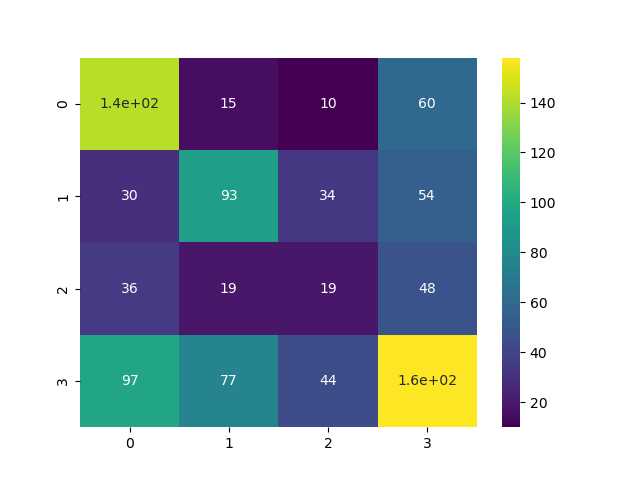

[INFO] evaluating on TEST...
0.44017094017094016
0.4401709401709401
[INFO] grid searching over the hyper-parameters...
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       227
           1       0.49      0.60      0.54       211
           2       0.06      0.02      0.03       122
           3       0.52      0.49      0.51       376

    accuracy                           0.51       936
   macro avg       0.41      0.45      0.42       936
weighted avg       0.46      0.51      0.48       936



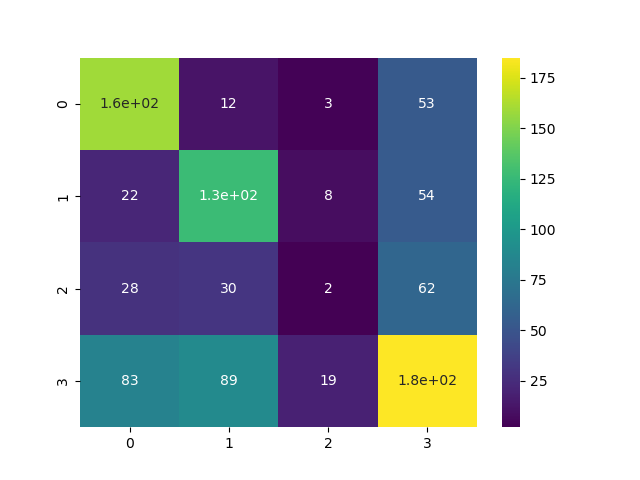


[INFO] evaluating on TEST...
0.5053418803418803
0.5053418803418803
[INFO] X, y TRAIN sets
(400, 768) (400,)

[INFO] X, y TEST sets
(936, 768) (936,)

[INFO] X, y TRAIN sets
(120, 768) (120,)

[INFO] X, y VALIDATION sets
(280, 768) (280,)
              precision    recall  f1-score   support

           0       0.49      0.62      0.55       227
           1       0.48      0.54      0.50       211
           2       0.26      0.21      0.23       122
           3       0.62      0.51      0.56       376

    accuracy                           0.51       936
   macro avg       0.46      0.47      0.46       936
weighted avg       0.51      0.51      0.50       936



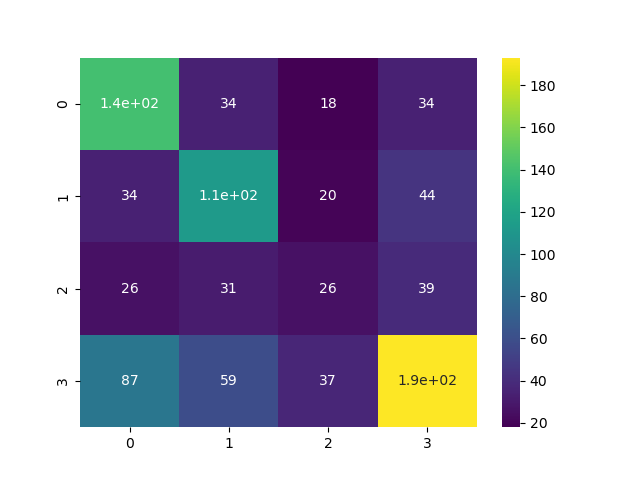

0.5053418803418803
0.5053418803418803
              precision    recall  f1-score   support

           0       0.47      0.64      0.55       227
           1       0.49      0.55      0.52       211
           2       0.30      0.11      0.16       122
           3       0.58      0.53      0.56       376

    accuracy                           0.51       936
   macro avg       0.46      0.46      0.44       936
weighted avg       0.50      0.51      0.49       936



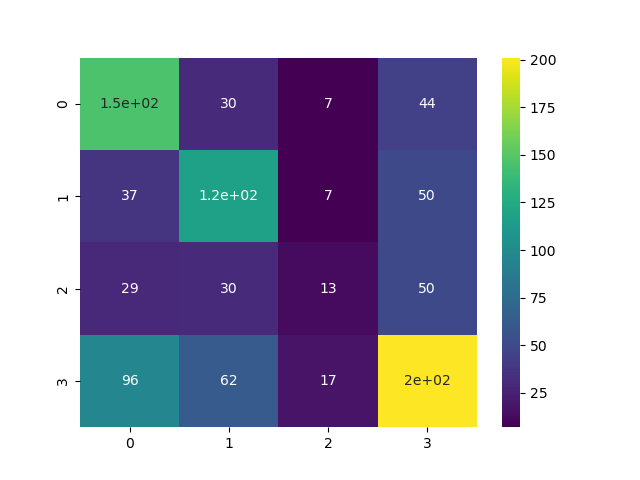

0.5096153846153846
0.5096153846153846
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.48      0.60      0.53       227
           1       0.47      0.53      0.50       211
           2       0.26      0.17      0.21       122
           3       0.61      0.53      0.57       376

    accuracy                           0.50       936
   macro avg       0.45      0.46      0.45       936
weighted avg       0.50      0.50      0.50       936



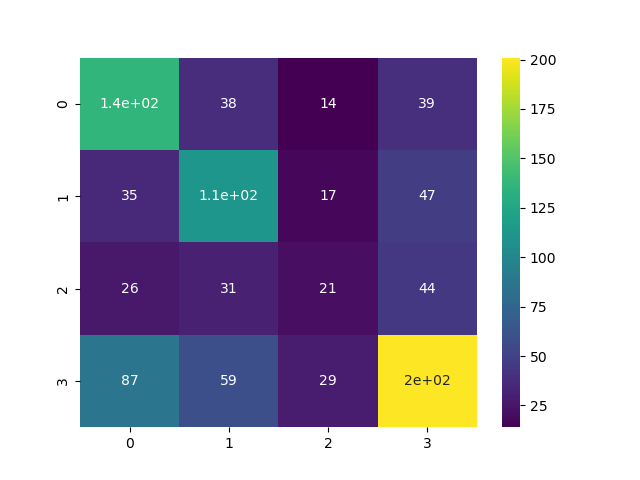


[INFO] evaluating on TEST...
0.5021367521367521
0.5021367521367521
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.47      0.64      0.55       227
           1       0.49      0.55      0.52       211
           2       0.30      0.11      0.16       122
           3       0.58      0.53      0.56       376

    accuracy                           0.51       936
   macro avg       0.46      0.46      0.44       936
weighted avg       0.50      0.51      0.49       936



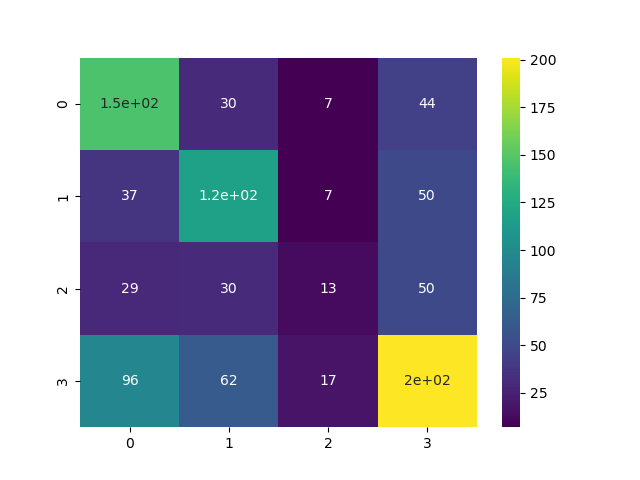


[INFO] evaluating on TEST...
0.5096153846153846
0.5096153846153846
[INFO] X, y TRAIN sets
(400, 2048) (400,)

[INFO] X, y TEST sets
(936, 2048) (936,)

[INFO] X, y TRAIN sets
(120, 2048) (120,)

[INFO] X, y VALIDATION sets
(280, 2048) (280,)
[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.29      0.34      0.31       227
           1       0.33      0.40      0.36       211
           2       0.25      0.13      0.17       122
           3       0.45      0.42      0.44       376

    accuracy                           0.36       936
   macro avg       0.33      0.32      0.32       936
weighted avg       0.36      0.36      0.36       936



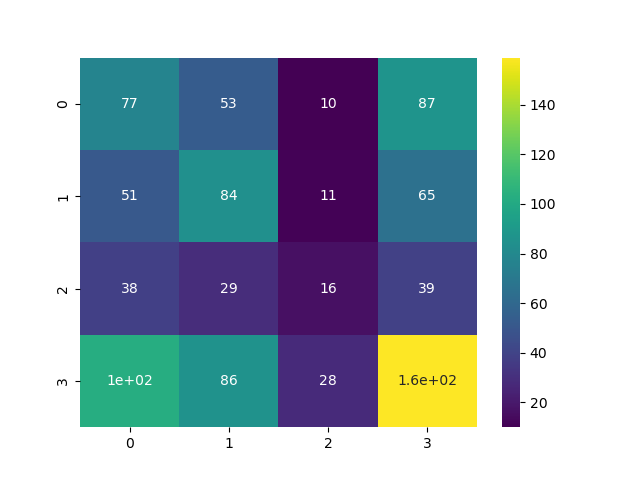

[INFO] evaluating on TEST...
0.358974358974359
0.358974358974359
[INFO] grid searching over the hyper-parameters...
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.30      0.34      0.32       227
           1       0.37      0.42      0.39       211
           2       0.17      0.10      0.13       122
           3       0.48      0.47      0.47       376

    accuracy                           0.38       936
   macro avg       0.33      0.33      0.33       936
weighted avg       0.37      0.38      0.37       936



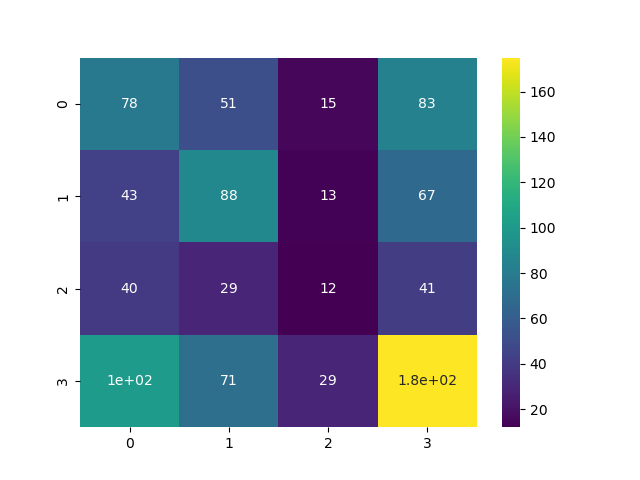


[INFO] evaluating on TEST...
0.37713675213675213
0.3771367521367522


In [3]:
%run 'audio-main.ipynb'
%run 'text-main.ipynb'
%run 'visual-main.ipynb'

## 1. Load Data + Reduce Temporal Dimension for Audio and Visual + Combine for Early Fusion + Split Data

In [4]:
true_labels_series = dataset_paths_copy.loc[0:, 'emotion_labels']
# print(true_labels_series)
true_labels = true_labels_series.tolist()
# print(true_labels)

audio_ys = audio_features_with_y.loc[0:, 'emotion_labels']
text_ys = text_features_with_y.loc[0:, 'emotion_labels']
visual_ys = visual_features_with_y.loc[0:, 'emotion_labels']

In [5]:
audio_reduced_temporal_dimensions, audio_true_labels = reduce_temporal_dimension(audio_features_paths, audio_ys)

In [6]:
loaded_text_features, text_true_labels = load_text_features(text_features_paths, text_ys)

In [7]:
visual_reduced_temporal_dimensions, visual_true_labels = reduce_temporal_dimension(visual_features_paths, visual_ys)
# np.shape(visual_reduced_temporal_dimensions), np.shape(true_labels)

In [8]:
"""IGNORE: Example of combining for early fusion"""
# a = np.arange(6).reshape(2,3)
# b = np.arange(2)
# c = np.column_stack((a, b))

# print(np.shape(a), a)
# print(np.shape(b), b)
# print(np.shape(c), c)

'IGNORE: Example of combining for early fusion'

In [9]:
audio_text_features = np.column_stack((audio_reduced_temporal_dimensions, loaded_text_features))
# np.shape(audio_text_features)

all_features = np.column_stack((visual_reduced_temporal_dimensions, audio_text_features))
np.shape(all_features)

(1336, 2944)

In [10]:
test_size = 0.7
X_train_all_features, X_test_all_features, X_val_all_features, y_train_all_features, y_test_all_features, y_val_all_features = split_data(all_features, true_labels, test_size)

[INFO] X, y TRAIN sets
(400, 2944) (400,)

[INFO] X, y TEST sets
(936, 2944) (936,)

[INFO] X, y TRAIN sets
(120, 2944) (120,)

[INFO] X, y VALIDATION sets
(280, 2944) (280,)


## 2. Perform a Multimodal 4-Class Emotion Classification

### Without Hyper-Parameter Tuning

In [11]:
def without_hyper_param_tuning(classification_estimator, X_train, y_train, X_test, y_test):    
    print("[INFO] training our linear support vector classification estimator")
    estimator = classification_estimator

    print("[INFO] fitting on TRAIN...")
    train_without_hp = estimator.fit(X_train, y_train)
    
    print("[INFO] classification on TEST...")
    # make a prediction (returns a list of 0 - 3 values)
    y_pred_without_hp = train_without_hp.predict(X_test)

    all_classification_report_without_hp = classification_report(y_test, y_pred_without_hp)
    print(all_classification_report_without_hp)

    # show true labels and predictions
    cm = confusion_matrix(y_test, y_pred_without_hp)
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.show()
    
    print("[INFO] evaluating on TEST...")
    test_without_hp = train_without_hp.score(X_test, y_test)
    print(test_without_hp)
    
    f1_micro = f1_score(y_test, y_pred_without_hp, average='micro')
    print(f1_micro)
    
    return f1_micro

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       227
           1       0.51      0.59      0.55       211
           2       0.28      0.27      0.27       122
           3       0.58      0.48      0.52       376

    accuracy                           0.52       936
   macro avg       0.48      0.50      0.48       936
weighted avg       0.52      0.52      0.51       936



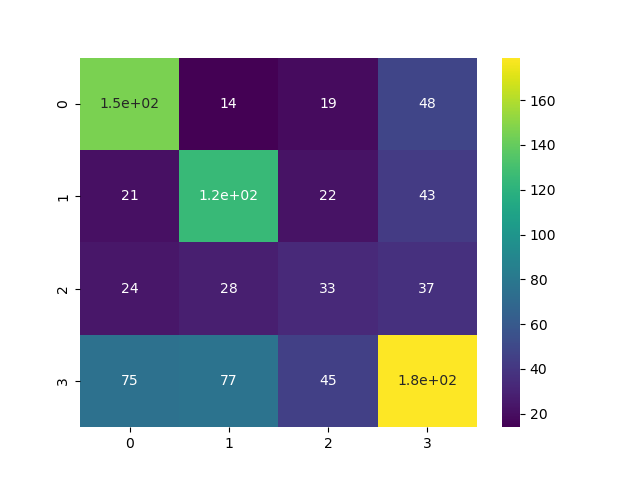

[INFO] evaluating on TEST...
0.5160256410256411
0.5160256410256411


In [12]:
classification_estimator = svm.LinearSVC()
f1_micro_linear_without_hp = without_hyper_param_tuning(classification_estimator, X_train_all_features, y_train_all_features, X_test_all_features, y_test_all_features)

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.45      0.56      0.50       227
           1       0.47      0.54      0.50       211
           2       0.17      0.03      0.05       122
           3       0.53      0.56      0.54       376

    accuracy                           0.48       936
   macro avg       0.41      0.42      0.40       936
weighted avg       0.45      0.48      0.46       936



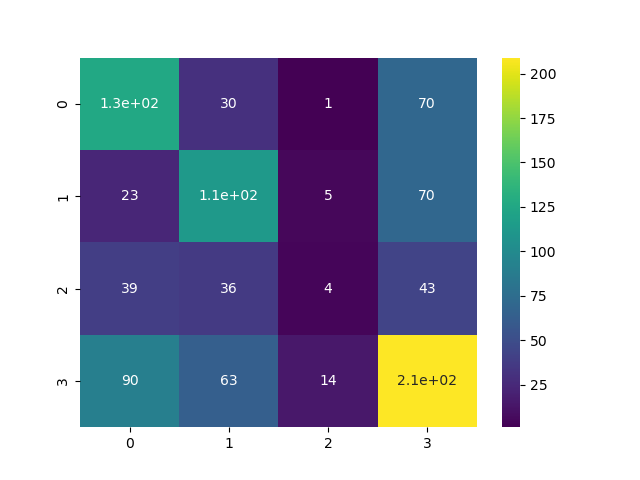

[INFO] evaluating on TEST...
0.4829059829059829
0.4829059829059829


In [13]:
classification_estimator = naive_bayes.BernoulliNB()
f1_micro_bernoulli_without_hp = without_hyper_param_tuning(classification_estimator, X_train_all_features, y_train_all_features, X_test_all_features, y_test_all_features)

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.43      0.58      0.49       227
           1       0.50      0.46      0.48       211
           2       0.26      0.04      0.07       122
           3       0.51      0.56      0.54       376

    accuracy                           0.48       936
   macro avg       0.43      0.41      0.40       936
weighted avg       0.46      0.48      0.45       936



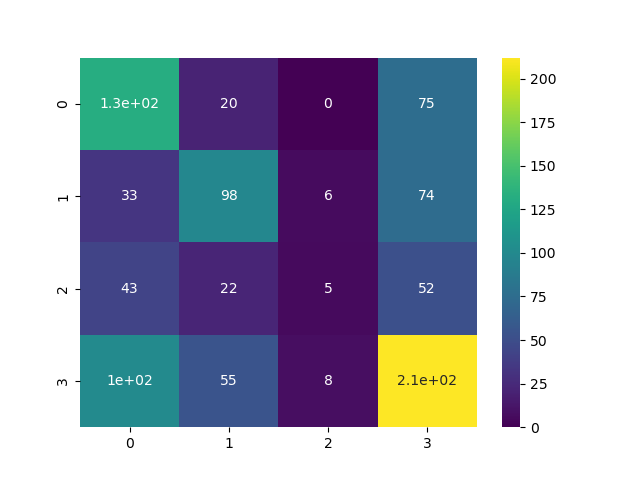

[INFO] evaluating on TEST...
0.4775641025641026
0.4775641025641026


In [14]:
classification_estimator = naive_bayes.GaussianNB()
f1_micro_gaussian_without_hp = without_hyper_param_tuning(classification_estimator, X_train_all_features, y_train_all_features, X_test_all_features, y_test_all_features)

## With Hyper-Parameter Tuning

In [15]:
# initialize the LinearSVC() estimator 
classification_estimator = svm.LinearSVC(max_iter=3650)

# define the hyper-parameters to perform the grid search over
param_grid = {
    'C': [0.01, 0.1, 10, 100], 
    # 'class_weight': [1],
    # 'dual':,
    'fit_intercept': [True, False],
    # 'intercept_scaling':,
    'loss': ['hinge', 'squared_hinge'],
    # 'max_iter':,
     # 'multi_class': [1],
    # 'penalty': ['l1', 'l2'],
    'penalty': ['l2'],
    # 'random_state':,
    # 'tol': , 
    # 'verbose':    
}

print("[INFO] grid searching over the hyper-parameters...")
# perform grid search with our estimator, hyper-parameters, cross-validation
linear_classification = GridSearchCV(classification_estimator, param_grid=param_grid, cv=10)
linear_classification

[INFO] grid searching over the hyper-parameters...


GridSearchCV(cv=10, estimator=LinearSVC(max_iter=3650),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']})

In [16]:
bernoulli_classifier = naive_bayes.BernoulliNB()
bernoulli_param_grid = {
    'alpha': [0.01, 0.1, 10, 100],
    'binarize': [0.01, 0.1, 10, 100],
    # 'class_prior': [0, 1, 2, 3],
    # 'class_prior': [4],
    'fit_prior': [True, False]
}

bernoulli_classification = GridSearchCV(bernoulli_classifier, param_grid=bernoulli_param_grid, cv=10)
bernoulli_classification

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.01, 0.1, 10, 100],
                         'binarize': [0.01, 0.1, 10, 100],
                         'fit_prior': [True, False]})

In [17]:
gaussian_classifier = naive_bayes.GaussianNB()
gaussian_param_grid = {
    # 'priors': [0, 1, 2, 3],
    # 'priors': [4],
    'var_smoothing': [True, False]
}

gaussian_classification = GridSearchCV(gaussian_classifier, param_grid=gaussian_param_grid, cv=10)
gaussian_classification

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [True, False]})

In [18]:
def with_hyper_param_tuning(classification_estimator, X_train, y_train, X_test, y_test):    
    
    np.seterr(divide='ignore', invalid='ignore')

    print("[INFO] training our linear support vector classification estimator")
    estimator = classification_estimator

    print("[INFO] fitting on TRAIN...")
    train_without_hp = estimator.fit(X_train, y_train)
    
    print("[INFO] classification on TEST...")
    # make a prediction (returns a list of 0 - 3 values)
    y_pred_without_hp = train_without_hp.predict(X_test)

   
    all_classification_report_without_hp = classification_report(y_test, y_pred_without_hp)
    print(all_classification_report_without_hp)
    

    # show true labels and predictions
    cm = confusion_matrix(y_test, y_pred_without_hp)
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.show()
    
    print("[INFO] evaluating on TEST...")
    test_without_hp = train_without_hp.score(X_test, y_test)
    print(test_without_hp)
    
    f1_micro = f1_score(y_test, y_pred_without_hp, average='micro')
    print(f1_micro)
    
    return f1_micro

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       227
           1       0.52      0.60      0.56       211
           2       0.28      0.26      0.27       122
           3       0.58      0.49      0.53       376

    accuracy                           0.52       936
   macro avg       0.48      0.50      0.49       936
weighted avg       0.52      0.52      0.52       936



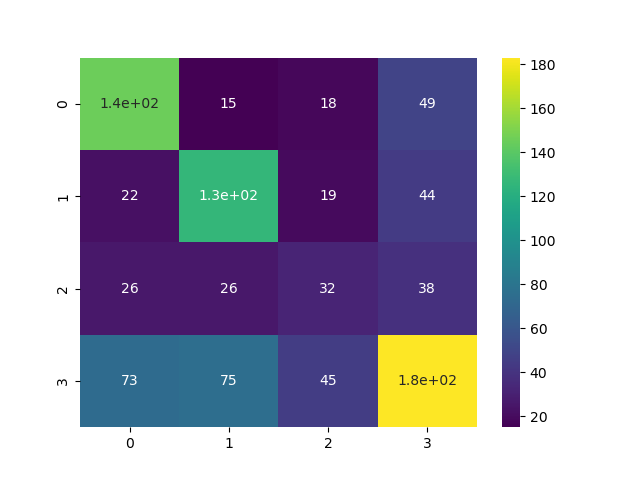

[INFO] evaluating on TEST...
0.5192307692307693
0.5192307692307693


In [19]:
f1_micro_linear_with_hp = with_hyper_param_tuning(linear_classification, X_train_all_features, y_train_all_features, X_test_all_features, y_test_all_features)

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.45      0.55      0.49       227
           1       0.47      0.54      0.50       211
           2       0.20      0.02      0.03       122
           3       0.54      0.58      0.56       376

    accuracy                           0.49       936
   macro avg       0.41      0.42      0.40       936
weighted avg       0.46      0.49      0.46       936



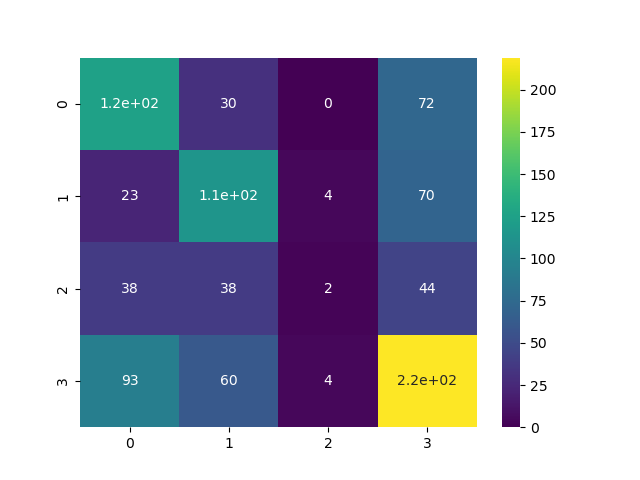

[INFO] evaluating on TEST...
0.49145299145299143
0.49145299145299143


In [20]:
f1_micro_bernoulli_with_hp = with_hyper_param_tuning(bernoulli_classification, X_train_all_features, y_train_all_features, X_test_all_features, y_test_all_features)

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] classification on TEST...
              precision    recall  f1-score   support

           0       0.38      0.82      0.52       227
           1       0.74      0.11      0.19       211
           2       0.21      0.05      0.08       122
           3       0.56      0.57      0.57       376

    accuracy                           0.46       936
   macro avg       0.47      0.39      0.34       936
weighted avg       0.51      0.46      0.41       936



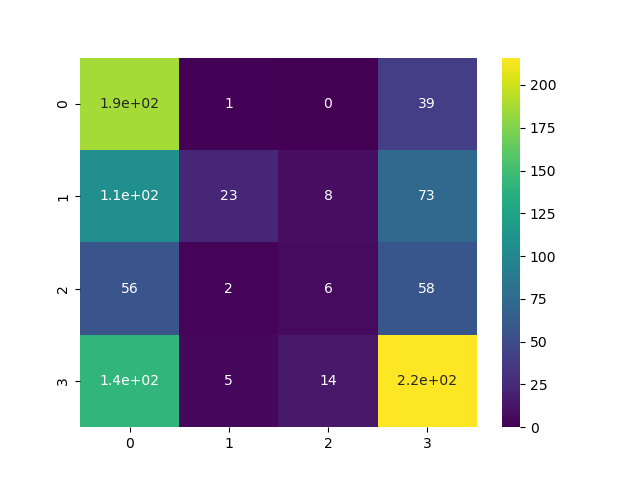

[INFO] evaluating on TEST...
0.46153846153846156
0.46153846153846156


In [21]:
f1_micro_gaussian_with_hp = with_hyper_param_tuning(gaussian_classification, X_train_all_features, y_train_all_features, X_test_all_features, y_test_all_features)